In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy import integrate

Number of function calls for classic rk4 is: 792
Number of function evaluations per step is: 4.0
Chi squared value is 3.012523865581229e-07


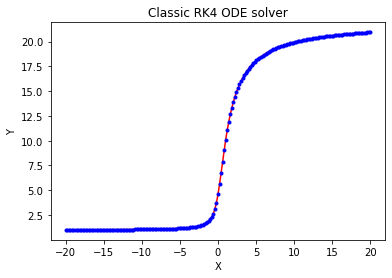

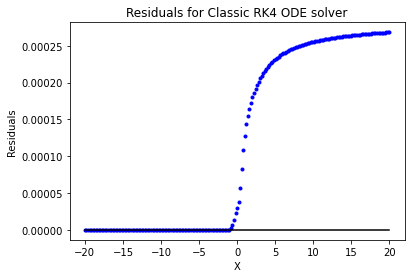

In [2]:
def f(x, y):
    f.counter += 1
    return y/(1+x**2)
f.counter = 0

def true(x, y0, x0):
    ##True solution to ODE
    sol =  y0*np.exp(np.arctan(x)-np.arctan(x0))
    return sol

def rk4_step(fun,x,y,h):
    k1=fun(x,y)*h
    k2=h*fun(x+h/2,y+k1/2)
    k3=h*fun(x+h/2,y+k2/2)
    k4=h*fun(x+h,y+k3)
    dy=(k1+2*k2+2*k3+k4)/6
    return y+dy

y0 = 1
nsteps = 199
x = np.linspace(-20, 20, nsteps)

true_y = true(x, y0, x[0])

rk4_y = np.zeros(len(x))
rk4_y[0] = y0
for i in range(len(x)-1):
    h = x[i+1] - x[i]
    new_y = rk4_step(f, x[i], rk4_y[i], h)
    rk4_y[i+1] = new_y

print('Number of function calls for classic rk4 is:', f.counter)
print('Number of function evaluations per step is:', f.counter / (len(x)-1))
chival = chisquare(true_y, rk4_y)[0]
print('Chi squared value is', chival)    
    
line = ['Number of function calls for classic rk4 is:', str(f.counter / (len(x)-1)),
        'Number of function evaluations per step for classic rk4 is: ', str(f.counter), 
        'Chi squared value for classic rk4 is:', str(chival)]
L = open('./problem1.txt', 'w')
for elem in line: 
    L.write(elem+'\n')
L.close()


plt.plot(x, true_y, 'r')
plt.plot(x, rk4_y, 'b.')
plt.plot()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Classic RK4 ODE solver')
plt.savefig('./Classic_RK4.pdf')
plt.show()

plt.plot(x, np.abs(true_y - rk4_y), 'b.')
plt.plot(x, true_y*0, 'k')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals for Classic RK4 ODE solver')
plt.savefig('./Residuals_Classic_RK4.pdf')
plt.show()

Number of function calls for half-step size rk4 is: 792
Number of function evaluations per step is: 12.0
Chi squared value is 5.675801491603989e-10
Ratio of chi squared is 530.7662486148516


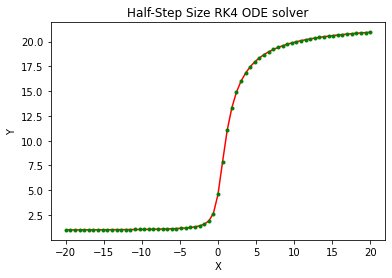

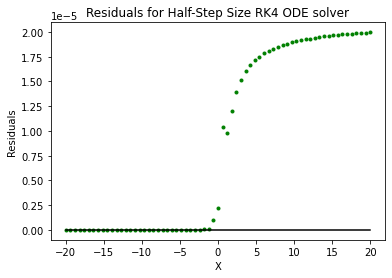

In [3]:
#Reset counter 
f.counter = 0

def rk4_stepd(fun, x, y, h):
    y1 = rk4_step(fun, x, y, h)
    y2_bis = rk4_step(fun, x, y, h/2)
    y2 = rk4_step(fun, x+h/2, y2_bis, h/2)
    Delta = y2 - y1
    return y2 + Delta/15

y0 = 1
nsteps = round(200/3)
x = np.linspace(-20, 20, nsteps)

true_y = true(x, y0, x[0])

rk4d_y = np.zeros(len(x))
rk4d_y[0] = y0
for i in range(len(x)-1):
    h = x[i+1] - x[i]
    new_yd = rk4_stepd(f, x[i], rk4d_y[i], h)
    rk4d_y[i+1] = new_yd
    
print('Number of function calls for half-step size rk4 is:', f.counter)
print('Number of function evaluations per step is:', f.counter / (len(x)-1))
print('Chi squared value is', chisquare(true_y, rk4d_y)[0])
print('Ratio of chi squared is', chival/chisquare(true_y, rk4d_y)[0])

line = ['Number of function calls for half-step size rk4 is:', str(f.counter),
        'Number of function evaluations per step for half-step size rk4 is:', str(f.counter / (len(x)-1)), 
        'Chi squared value for half-step size rk4 is:', str(chisquare(true_y, rk4d_y)[0]), 
        'Ratio of classic rk4 chi squared to half-step size rk4 chi squared is:', str(chival/chisquare(true_y, rk4d_y)[0]), 
        'Because the half-step size rk4 chi squared is smaller than the ' 
        'classic rk4 chi squared we conclude that the half-step size method is more accurate.']
L = open('./problem1.txt', 'a')
for elem in line: 
    L.write(elem+'\n')
L.close()

plt.plot(x, true_y, 'r')
plt.plot(x, rk4d_y, 'g.')
plt.plot()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Half-Step Size RK4 ODE solver')
plt.savefig('./HalfStep_RK4.pdf')
plt.show()

plt.plot(x, np.abs(true_y - rk4d_y), 'g.')
plt.plot(x, true_y*0, 'k')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals for Half-Step Size RK4 ODE solver')
plt.savefig('./Residuals_HalfStep_RK4.pdf')
plt.show()

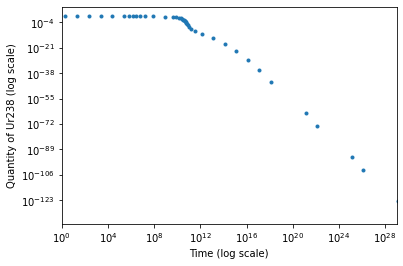

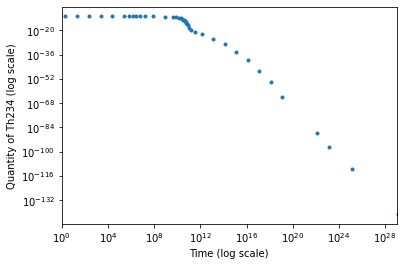

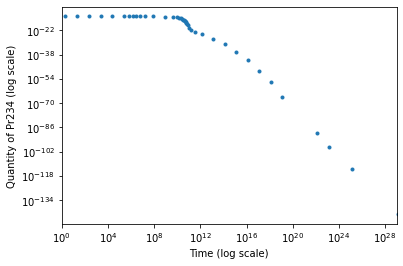

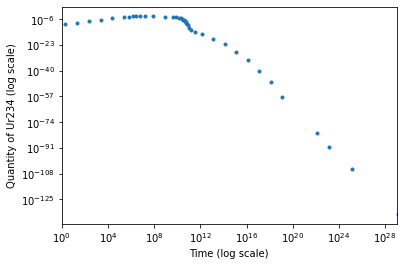

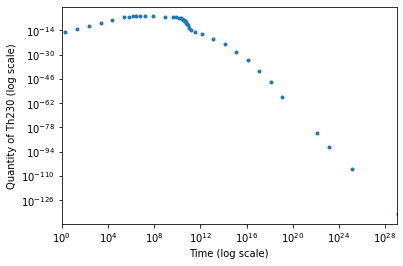

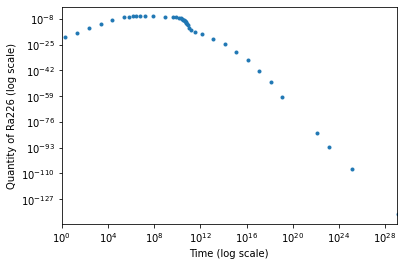

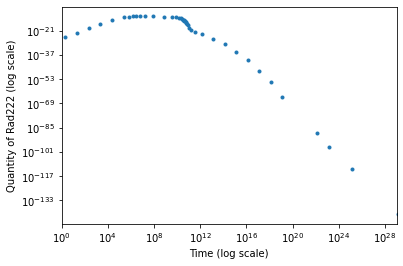

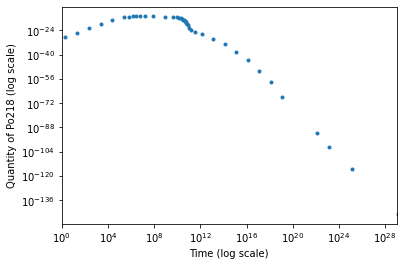

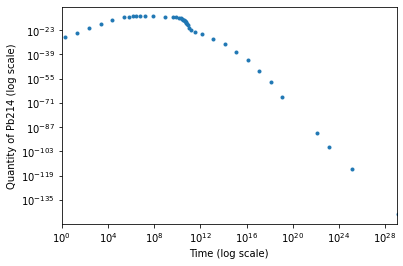

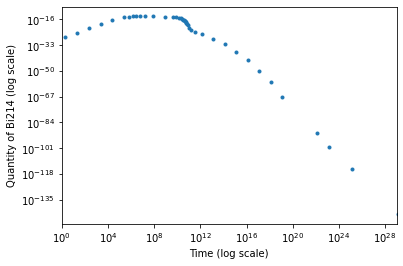

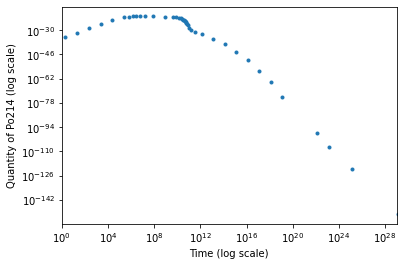

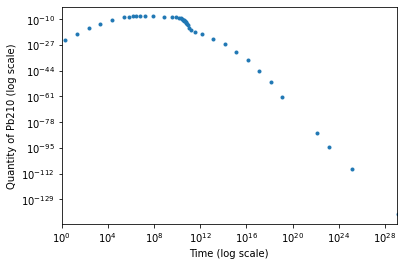

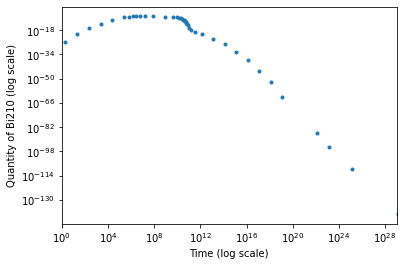

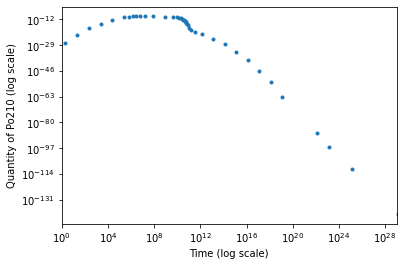

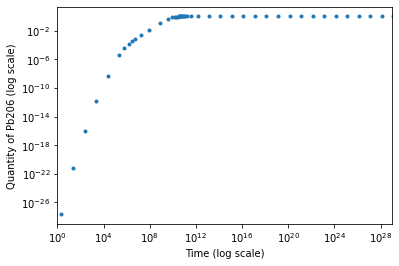

<ipython-input-5-d3fe7c4afe50>:59: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(timerange, y_u238/y_pb206, '.', label='Quantity of Uranium')


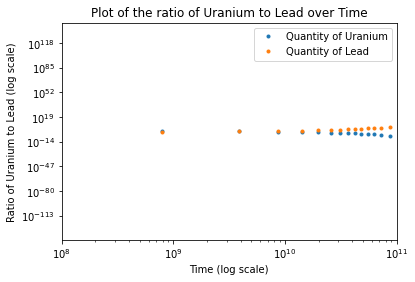

<ipython-input-5-d3fe7c4afe50>:72: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(timerange, y_u238/y_pb206, '.', label='Ratio Uranium to Lead')
<ipython-input-5-d3fe7c4afe50>:74: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(timerange, y_pb206/y_pb206, 'k--', label='Reference at 1')


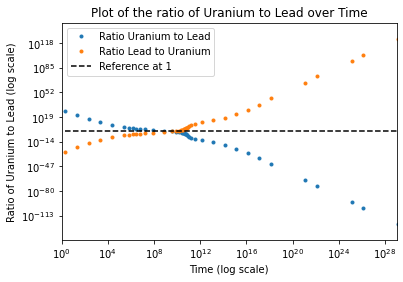

In [5]:
#Set up the half-life values. We use a year as the reference time value. 
#We chose a year as it seemed to be in the same order magnitude as the average 
#half-life for all the elements. 
half_life = np.array([4.468e9, 0.06603, 7.65e-4, 245500, 75380, 1600, 0.010475, 5.9e-6, 5.099e-5, 3.786e-5, 5.2099e-12, 22.3, 5.015, 0.37911])

#Define the decay rates as ln(2)/T_1/2
decayrate = np.log(2) / half_life

#Define the function to get the derivatives for each element. 
def fun(x,y,half_life=decayrate):
    #Setup a matrix to calculate dydx
    dydx_matrix=np.zeros((len(half_life)+1, len(half_life)+1))
    dydx_matrix[0][0] = -half_life[0]
    dydx_matrix[len(half_life)][len(half_life)-1] = half_life[len(half_life)-1]
    for i in range(1, len(half_life)):
        for j in range(i-1, i+1):
            if j == i:
                dydx_matrix[i][j] = -half_life[j]
            else : 
                dydx_matrix[i][j] = half_life[j]
    #calculate dydx for each element using the matrix defined above
    dydx = dydx_matrix@y
    return dydx

#Initiate the amount of elements to 1 for Uranium and 0 for everything else.
y0=np.zeros(len(decayrate)+1)
y0[0] = 1
#Initiate the time range over which we want to solve. We take large values because
#U_238's half-life is ~10^9 years. 
x = (1e-10, 1e30)

#Use the scipy ODE solver with the Radau method to take into account the widely varying 
#half-lives.
ans_stiff = integrate.solve_ivp(fun, x, y0, method='Radau')
#Get the timerange for plotting below. 
timerange = ans_stiff['t']
#Define list of labels for plotting the evolution of the 15 different elements. 
label = ['Ur238', 'Th234', 'Pr234', 'Ur234', 'Th230', 'Ra226', 'Rad222', 'Po218', 'Pb214', 'Bi214', 'Po214', 'Pb210', 'Bi210', 'Po210', 'Pb206']
for i, y in enumerate(ans_stiff['y']):
    #Plot the evolution of all 15 elements over time. 
    plt.plot(timerange, y, '.')
    plt.xlabel("Time (log scale)")
    plt.ylabel("Quantity of "+label[i]+" (log scale)")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(1, 1e29)
    plt.savefig('./AmountOf'+label[i]+'.pdf')
    plt.show()
    
#Get the quantities of Uranium 238 and Lead 206 to plot their ratio.
#We pick two different time scales for plotting : one that will show 
#where the two curves interesct, which corresponds to the time at which
#we have the same amount of uranium 238 as lead 206. 
#We also plot a wider view.

#Plotting close look
y_u238 = ans_stiff['y'][0]
y_pb206 = ans_stiff['y'][14]
plt.plot(timerange, y_u238/y_pb206, '.', label='Quantity of Uranium')
plt.plot(timerange, y_pb206/y_u238, '.', label='Quantity of Lead')
plt.xlabel('Time (log scale)')
plt.ylabel('Ratio of Uranium to Lead (log scale)')
plt.title('Plot of the ratio of Uranium to Lead over Time')
plt.legend()
plt.xlim(1e8, 1e11)
plt.xscale("log")
plt.yscale("log")
plt.savefig('./UraniumToLeadRatio_CloserLook.pdf')
plt.show()

#Plotting wider view
plt.plot(timerange, y_u238/y_pb206, '.', label='Ratio Uranium to Lead')
plt.plot(timerange, y_pb206/y_u238, '.', label='Ratio Lead to Uranium')
plt.plot(timerange, y_pb206/y_pb206, 'k--', label='Reference at 1')
plt.xlabel('Time (log scale)')
plt.ylabel('Ratio of Uranium to Lead (log scale)')
plt.title('Plot of the ratio of Uranium to Lead over Time')
plt.legend()
plt.xlim(1, 1e29)
plt.xscale("log")
plt.yscale("log")
plt.savefig('./UraniumToLeadRatio.pdf')
plt.show()

#Writing to an output file.
line = ['We choose to use the scipy ODE solver for simplicity. We will set up the '
       'problem to be able as to use this solver.', 'We know that the decay rate is ' 
       ' equal to ln(2)/T_1/2 where T_1/2 is the half-life.', 'As we can see in the '
        'UraniumToLeadRatio_CloserLook.pdf, we notice that there is the same proportion ' 
        'of uranium and '
        'lead around 4*10^9 years.', 'This is approximately the half-life of uranium, '
        'which makes sense since we expect half the uranium to have decayed into lead at that '
        'time.','The value is higher than the actual half-life because the intermediary products '
        'slightly increase the time it takes for uranium to decay even though their half-life is '
        'only a fraction of U_238s.']
L = open('./problem2.txt', 'w')
for elem in line: 
    L.write(elem+'\n')
L.close()

In [119]:
#####Problem 3

#Extracting the data from local txt file. 
data = np.loadtxt('./dish_zenith.txt', dtype=float)
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]


#Vstacking z values to make a vertical matrix.
Z = np.vstack(z)
#Make the A matrix containing the x1, x2, x3 and x4 values 
A = np.zeros((len(Z), 4))
A[:, 0] = x**2 + y**2
A[:, 1] = x
A[:, 2] = y
A[:, 3] = 1

#Getting the best fit parameters
coeff = np.linalg.pinv(A)@Z

#Getting the a, x0, y0 and z0 values from the best fit parameters
a = coeff[0][0]
print(a)
x0 = -coeff[1][0]/(2*a)
y0 = -coeff[2][0]/(2*a)
z0 = coeff[3][0] - a*(x0**2 + y0**2)

#Generating the z values obtained with our best fit parameters
sol = A@coeff

#Generating the noise matrix
mynoise = np.std(sol.T[0] - z)
N = np.eye(len(x))*mynoise**2

#Getting the errors on our parameters 
mat = np.linalg.pinv(A.T@np.linalg.pinv(N)@A)
param_err = np.sqrt(np.diag(mat))

#We extract the error on a.
a_err = param_err[0]

#Calculate the focal length a from f.
f = 1/(4*a)

#Calculate the error on f using the equation in problem3.txt.
f_err = (a_err/a)*f
print(f_err)
#Writing to output text file.
line = ['a)', 'We can linearize z-z0 = a*((x-x0)^2 + (y-y0)^2) as such:', 
        'z = a*(x^2+y^2) -2a*x0*x - 2a*y0*y +z0 +a*(x0^2 + y0^2).', 
        'By setting x1 = x^2+y^2, x2 = x, x3 = y, x4 = 1 and '
        'c1 = a, c2 = -2a*x0, c3 = -2a*y0, c4 = z0 + a*(x0^2 + y0^2) we have '
        'linearized the problem.', 'Then a = c1, x0 = -c2/2*a, y0 = -c3/2*a and z0 = c4 - a*(x0^2 + y0^2).', 
        'b)','My best fit parameters are : ', 'a = '+str(a)+' mm', 'x0 = '+str(x0)+' mm', 'y0 = '+str(y0)+' mm', 
        'z0 = '+str(z0)+' mm', 'c)', 'We know that for a parabola f = 1/(4a) so the error on f is given by: ',
        'e_f = Sqrt((df/da)^2 * e_a^2) = Sqrt(e_a^2 / (16*a^4)) = e_a / (4*a^2) = (e_a/a)*f.', 'Then my estimate for '
        'the focal length f is: '+str(f*1e-3)+' m', 'The error on my estimate of f is: '+str(f_err*1e-3)+' m']
L = open('./problem3.txt', 'w')
for elem in line: 
    L.write(elem+'\n')
L.close()

0.0001667044547739948
[6.45189976e-08 1.25061100e-04 1.19249564e-04 3.12018436e-01]
0.5804077581894036


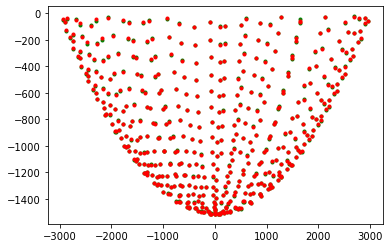

In [108]:
plt.plot(x, z, 'g.')
plt.plot(x, sol, 'r.')

In [85]:
1/6

0.16666666666666666

Number of function calls for classic rk4 is: 792
Number of function evaluations per step is: 4.0
Chi squared value is 3.012523865581229e-07


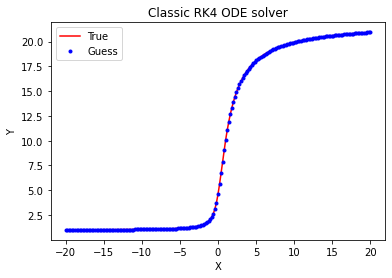

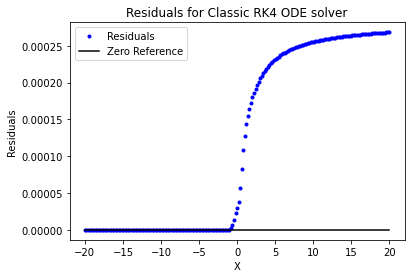

Number of function calls for half-step size rk4 is: 792
Number of function evaluations per step is: 12.0
Chi squared value is 5.675801491603989e-10
Ratio of chi squared is 530.7662486148516


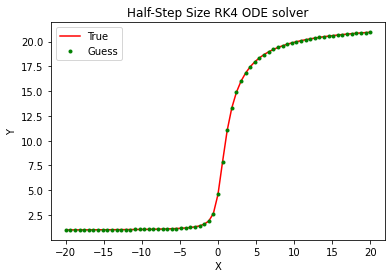

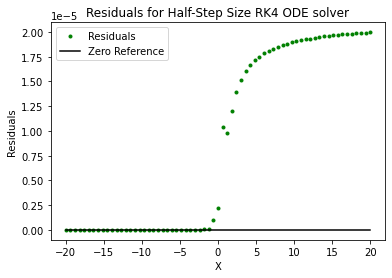

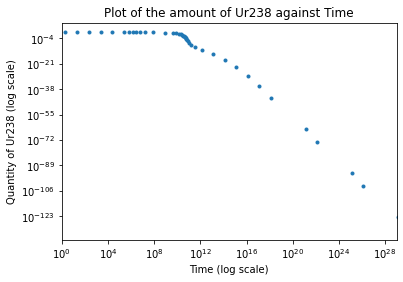

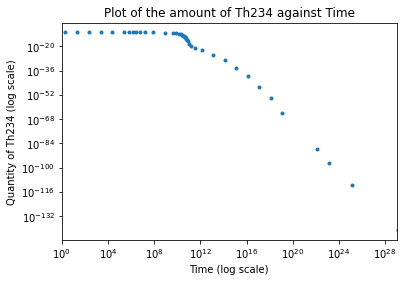

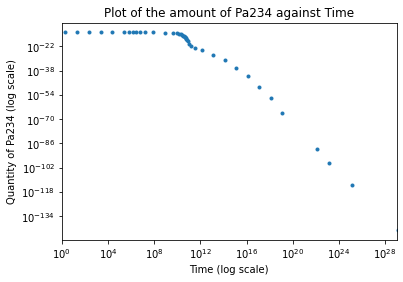

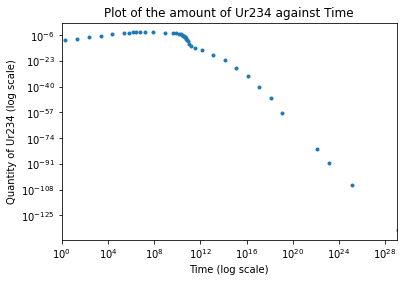

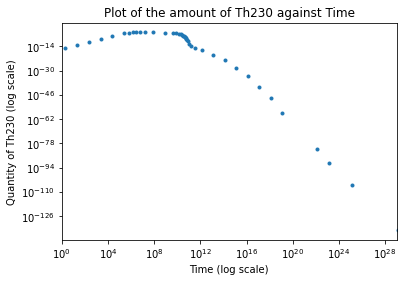

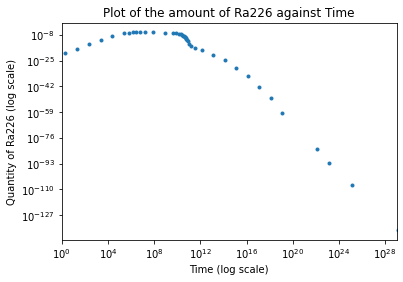

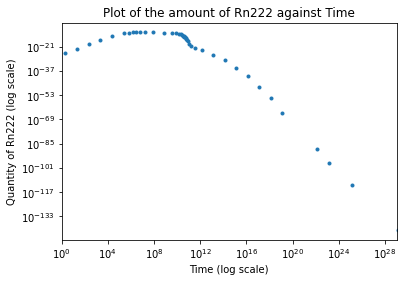

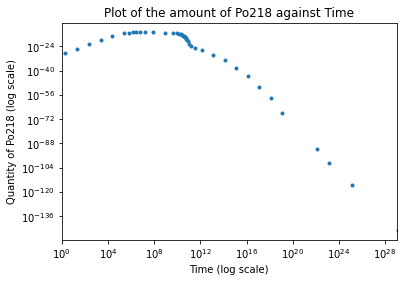

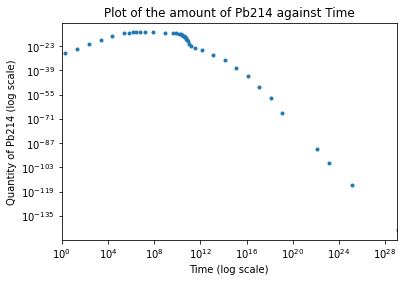

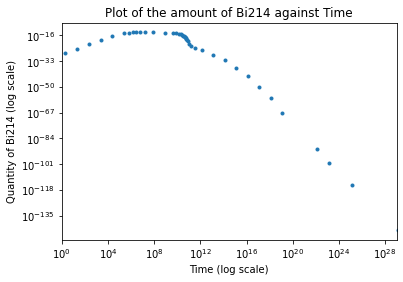

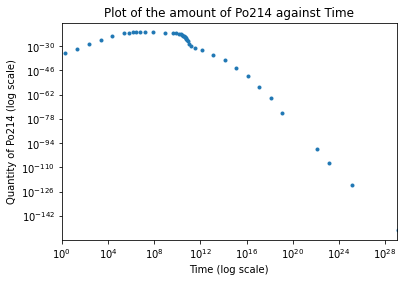

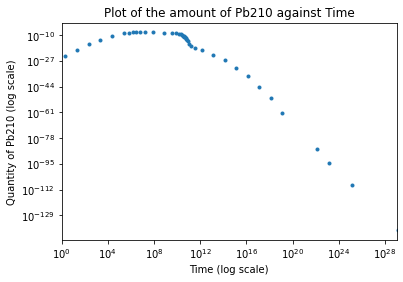

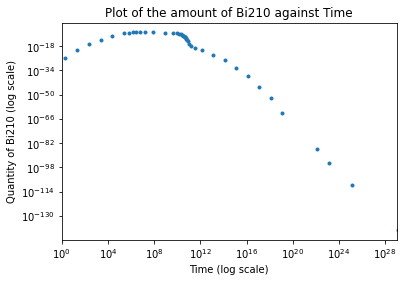

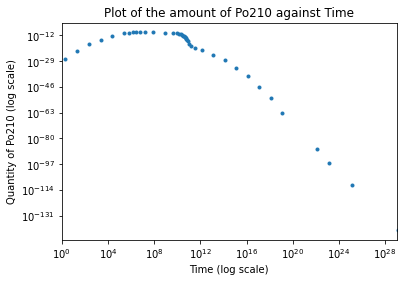

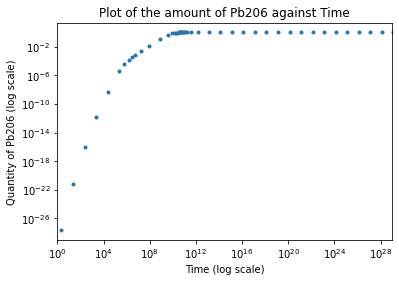

<ipython-input-1-e810e8005d6a>:227: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(timerange, y_u238/y_pb206, '.', label='Quantity of Uranium')


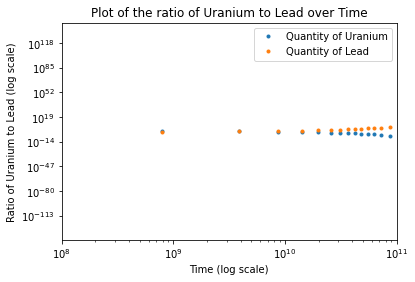

<ipython-input-1-e810e8005d6a>:240: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(timerange, y_u238/y_pb206, '.', label='Ratio Uranium to Lead')
<ipython-input-1-e810e8005d6a>:242: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(timerange, y_pb206/y_pb206, 'k--', label='Reference at 1')


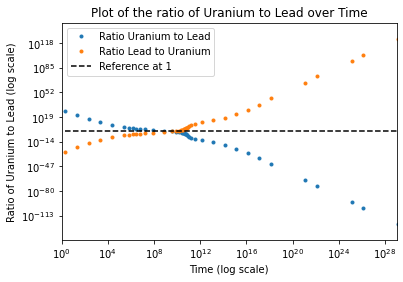

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy import integrate
import os

#Create directories for each problem.
os.mkdir('./P1')
os.mkdir('./P2')
os.mkdir('./P3')

####Problem 1
#Define function for the ODE, as well as counter to count the 
#number of function evaluations
def f(x, y):
    f.counter += 1
    return y/(1+x**2)
f.counter = 0

#Define true function to plot with our estimation and look at the residuals
#to see which method is better. 
#When solving the given ODE we get dy/y = dx/1+x^2. This is solvable and gives the 
#solution y(x) = y_0 * e^(arctan(x) - arctan(x_0)), with x_0 = -20 and y_0 = y(-20) = 1
def true(x, y0, x0):
    sol =  y0*np.exp(np.arctan(x)-np.arctan(x0))
    return sol

#Using rk4 code defined in class
#updating y already in rk4_step
def rk4_step(fun,x,y,h):
    k1=fun(x,y)*h
    k2=h*fun(x+h/2,y+k1/2)
    k3=h*fun(x+h/2,y+k2/2)
    k4=h*fun(x+h,y+k3)
    dy=(k1+2*k2+2*k3+k4)/6
    return y+dy

#Defining global variables
#We set the number of steps to 199, so that we get the same number of function calls for both methods. 
#I found that when using 200 steps for rk4_step I got 796 function calls and when I used rk4_stepd with
#200/3 = 67 steps I got 792 function calls. To get rid of this difference I reduced the number of steps done
# by rk4_step by 1, so that I would get 796-4=792 function calls.
y0 = 1
nsteps = 199
#Defining x range
x = np.linspace(-20, 20, nsteps)
#Getting the true solution to the ODE
true_y = true(x, y0, x[0])

#Initializing my solution to the ODE
rk4_y = np.zeros(len(x))
rk4_y[0] = y0
#Getting all the y values using rk4_step
for i in range(len(x)-1):
    h = x[i+1] - x[i]
    new_y = rk4_step(f, x[i], rk4_y[i], h)
    rk4_y[i+1] = new_y

#Printing the total and per step number of function calls
print('Number of function calls for classic rk4 is:', f.counter)
print('Number of function evaluations per step is:', f.counter / (len(x)-1))
chival = chisquare(true_y, rk4_y)[0]
print('Chi squared value is', chival)

#Writing output to text file
line = ['Number of function calls for classic rk4 is:', str(f.counter),
        'Number of function evaluations per step for classic rk4 is: ', str(f.counter / (len(x)-1)), 
        'Chi squared value for classic rk4 is:', str(chival)]
L = open('./P1/problem1.txt', 'w')
for elem in line: 
    L.write(elem+'\n')
L.close()

#Plotting my solution using rk4_step with the residuals
plt.plot(x, true_y, 'r', label='True')
plt.plot(x, rk4_y, 'b.', label='Guess')
plt.plot()
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Classic RK4 ODE solver')
plt.savefig('./P1/Classic_RK4.pdf')
plt.show()

plt.plot(x, np.abs(true_y - rk4_y), 'b.', label='Residuals')
plt.plot(x, true_y*0, 'k', label='Zero Reference')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals for Classic RK4 ODE solver')
plt.savefig('./P1/Residuals_Classic_RK4.pdf')
plt.show()

#Resetting the function counter for the second method
f.counter = 0

#Defining the function for the RK4 half-step size method.
#We call the rk4 3 times, once with a step size of h and twice
# with a step size of h/2. We then compare the values of both approaches
# and define the difference as Delta. We use this delta to cancel out
#the leading-order error term in RK4. 
def rk4_stepd(fun, x, y, h):
    y1 = rk4_step(fun, x, y, h)
    y2_bis = rk4_step(fun, x, y, h/2)
    y2 = rk4_step(fun, x+h/2, y2_bis, h/2)
    Delta = y2 - y1
    return y2 + Delta/15

#As described above, the half-step size method calls the rk4 method 3 times. 
#So, in order to get the same number of function calls for both methods, we have to decrease
#the number of x values taken by 3 for the half-step size method.
#So we redefine nsteps to be 200/3 or 67. 
nsteps = round(200/3)
x = np.linspace(-20, 20, nsteps)

#Redefining the true solution of the ODE with the new x values
true_y = true(x, y0, x[0])

#Initializing my solution to the ODE. 
rk4d_y = np.zeros(len(x))
rk4d_y[0] = y0
#Getting all the y values using rk4_stepd
for i in range(len(x)-1):
    h = x[i+1] - x[i]
    new_yd = rk4_stepd(f, x[i], rk4d_y[i], h)
    rk4d_y[i+1] = new_yd

#Printing the total and per step number of function calls
print('Number of function calls for half-step size rk4 is:', f.counter)
print('Number of function evaluations per step is:', f.counter / (len(x)-1))
print('Chi squared value is', chisquare(true_y, rk4d_y)[0])
print('Ratio of chi squared is', chival/chisquare(true_y, rk4d_y)[0])

#Writing to output text file
line = ['Number of function calls for half-step size rk4 is:', str(f.counter),
        'Number of function evaluations per step for half-step size rk4 is:', str(f.counter / (len(x)-1)), 
        'Chi squared value for half-step size rk4 is:', str(chisquare(true_y, rk4d_y)[0]), 
        'Ratio of classic rk4 chi squared to half-step size rk4 chi squared is:', str(chival/chisquare(true_y, rk4d_y)[0]), 
        'Because the half-step size rk4 chi squared is smaller than the ' 
        'classic rk4 chi squared we conclude that the half-step size method is more accurate.']
L = open('./P1/problem1.txt', 'a')
for elem in line: 
    L.write(elem+'\n')
L.close()

#Plotting my solution using rk4_stepd with the residuals
plt.plot(x, true_y, 'r', label='True')
plt.plot(x, rk4d_y, 'g.', label='Guess')
plt.plot()
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Half-Step Size RK4 ODE solver')
plt.savefig('./P1/HalfStep_RK4.pdf')
plt.show()

plt.plot(x, np.abs(true_y - rk4d_y), 'g.', label='Residuals')
plt.plot(x, true_y*0, 'k', label='Zero Reference')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals for Half-Step Size RK4 ODE solver')
plt.savefig('./P1/Residuals_HalfStep_RK4.pdf')
plt.show()


####Problem 2
#Set up the half-life values. We use a year as the reference time value. 
#We chose a year as it seemed to be in the same order magnitude as the average 
#half-life for all the elements. 
half_life = np.array([4.468e9, 0.06603, 7.65e-4, 245500, 75380, 1600, 0.010475, 5.9e-6, 5.099e-5, 3.786e-5, 5.2099e-12, 22.3, 5.015, 0.37911])

#Define the decay rates as ln(2)/T_1/2
decayrate = np.log(2) / half_life

#Define the function to get the derivatives for each element. 
def fun(x,y,half_life=decayrate):
    #Setup a matrix to calculate dydx
    dydx_matrix=np.zeros((len(half_life)+1, len(half_life)+1))
    dydx_matrix[0][0] = -half_life[0]
    dydx_matrix[len(half_life)][len(half_life)-1] = half_life[len(half_life)-1]
    for i in range(1, len(half_life)):
        for j in range(i-1, i+1):
            if j == i:
                dydx_matrix[i][j] = -half_life[j]
            else : 
                dydx_matrix[i][j] = half_life[j]
    #calculate dydx for each element using the matrix defined above
    dydx = dydx_matrix@y
    return dydx

#Initiate the amount of elements to 1 for Uranium and 0 for everything else.
y0=np.zeros(len(decayrate)+1)
y0[0] = 1
#Initiate the time range over which we want to solve. We take large values because
#U_238's half-life is ~10^9 years. 
x = (1e-10, 1e30)

#Use the scipy ODE solver with the Radau method to take into account the widely varying 
#half-lives.
ans_stiff = integrate.solve_ivp(fun, x, y0, method='Radau')
#Get the timerange for plotting below. 
timerange = ans_stiff['t']
#Define list of labels for plotting the evolution of the 15 different elements. 
label = ['Ur238', 'Th234', 'Pa234', 'Ur234', 'Th230', 'Ra226', 'Rn222', 'Po218', 'Pb214', 'Bi214', 'Po214', 'Pb210', 'Bi210', 'Po210', 'Pb206']
for i, y in enumerate(ans_stiff['y']):
    #Plot the evolution of all 15 elements over time. 
    plt.plot(timerange, y, '.')
    plt.xlabel("Time (log scale)")
    plt.ylabel("Quantity of "+label[i]+" (log scale)")
    plt.xscale("log")
    plt.yscale("log")
    plt.title('Plot of the amount of '+label[i]+' against Time')
    plt.xlim(1, 1e29)
    plt.savefig('./P2/AmountOf'+label[i]+'.pdf')
    plt.show()
    
#Get the quantities of Uranium 238 and Lead 206 to plot their ratio.
#We pick two different time scales for plotting : one that will show 
#where the two curves interesct, which corresponds to the time at which
#we have the same amount of uranium 238 as lead 206. 
#We also plot a wider view.

#Plotting close look
y_u238 = ans_stiff['y'][0]
y_pb206 = ans_stiff['y'][14]
plt.plot(timerange, y_u238/y_pb206, '.', label='Quantity of Uranium')
plt.plot(timerange, y_pb206/y_u238, '.', label='Quantity of Lead')
plt.xlabel('Time (log scale)')
plt.ylabel('Ratio of Uranium to Lead (log scale)')
plt.title('Plot of the ratio of Uranium to Lead over Time')
plt.legend()
plt.xlim(1e8, 1e11)
plt.xscale("log")
plt.yscale("log")
plt.savefig('./P2/UraniumToLeadRatio_CloserLook.pdf')
plt.show()

#Plotting wider view
plt.plot(timerange, y_u238/y_pb206, '.', label='Ratio Uranium to Lead')
plt.plot(timerange, y_pb206/y_u238, '.', label='Ratio Lead to Uranium')
plt.plot(timerange, y_pb206/y_pb206, 'k--', label='Reference at 1')
plt.xlabel('Time (log scale)')
plt.ylabel('Ratio of Uranium to Lead (log scale)')
plt.title('Plot of the ratio of Uranium to Lead over Time')
plt.legend()
plt.xlim(1, 1e29)
plt.xscale("log")
plt.yscale("log")
plt.savefig('./P2/UraniumToLeadRatio.pdf')
plt.show()

#Writing to an output file.
line = ['a)','We choose to use the scipy ODE solver for simplicity. We will set up the '
       'problem to be able as to use this solver.', 'b)','We know that the decay rate is ' 
       ' equal to ln(2)/T_1/2 where T_1/2 is the half-life.', 'As we can see in the '
        'UraniumToLeadRatio_CloserLook.pdf, we notice that there is the same proportion ' 
        'of uranium and '
        'lead around 4*10^9 years.', 'This is approximately the half-life of uranium, '
        'which makes sense since we expect half the uranium to have decayed into lead at that '
        'time.','The value is higher than the actual half-life because the intermediary products '
        'slightly increase the time it takes for uranium to decay even though their half-life is '
        'only a fraction of U_238s.']
L = open('./P2/problem2.txt', 'w')
for elem in line: 
    L.write(elem+'\n')
L.close()

#####Problem 3
#Extracting the data from local txt file. 
data = np.loadtxt('./dish_zenith.txt', dtype=float)
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

#Vstacking z values to make a vertical matrix.
Z = np.vstack(z)

#Make the A matrix containing the x1, x2, x3 and x4 values (as discussed in problem3.txt)
A = np.zeros((len(Z), 4))
A[:, 0] = x**2 + y**2
A[:, 1] = x
A[:, 2] = y
A[:, 3] = 1

#Getting the best fit parameters.
coeff = np.linalg.pinv(A)@Z

#Getting the a, x0, y0 and z0 values from the best fit parameters.
a = coeff[0][0]
x0 = -coeff[1][0]/(2*a)
y0 = -coeff[2][0]/(2*a)
z0 = coeff[3][0] - a*(x0**2 + y0**2)

#Generating the z values obtained with our best fit parameters.
sol = A@coeff

#Generating the noise matrix.
mynoise = np.std(sol.T[0] - z)
N = np.eye(len(x))*mynoise**2

#Getting the errors on our parameters 
mat = np.linalg.pinv(A.T@np.linalg.pinv(N)@A)
param_err = np.sqrt(np.diag(mat))

#We extract the error on a.
a_err = param_err[0]

#Calculate the focal length a from f.
f = 1/(4*a)

#Calculate the error on f using the equation in problem3.txt.
f_err = (a_err/a)*f

#Writing to output text file.
line = ['a)', 'We can linearize z-z0 = a*((x-x0)^2 + (y-y0)^2) as such:', 
        'z = a*(x^2+y^2) -2a*x0*x - 2a*y0*y +z0 +a*(x0^2 + y0^2).', 
        'By setting x1 = x^2+y^2, x2 = x, x3 = y, x4 = 1 and '
        'c1 = a, c2 = -2a*x0, c3 = -2a*y0, c4 = z0 + a*(x0^2 + y0^2) we have '
        'linearized the problem.', 'Then a = c1, x0 = -c2/2*a, y0 = -c3/2*a and z0 = c4 - a*(x0^2 + y0^2).', 
        'b)','My best fit parameters are : ', 'a = '+str(a)+' mm', 'x0 = '+str(x0)+' mm', 'y0 = '+str(y0)+' mm', 
        'z0 = '+str(z0)+' mm', 'c)', 'We know that for a parabola f = 1/(4a) so the error on f is given by: ',
        'e_f = Sqrt((df/da)^2 * e_a^2) = Sqrt(e_a^2 / (16*a^4)) = e_a / (4*a^2) = (e_a/a)*f.', 'Then my estimate for '
        'the focal length f is: '+str(f*1e-3)+' m', 'The error on my estimate of f is: '+str(f_err*1e-3)+' m']
L = open('./P3/problem3.txt', 'w')
for elem in line: 
    L.write(elem+'\n')
L.close()

